In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(6,6)}, 
    style="darkgrid"
)

In [4]:
with open("../data/n2c2-community-annotations_2010-fan-why-QA/relations_whyqa_ann-v7-share.json") as json_file:
    json_data = json.load(json_file)a

In [5]:
print(len(json_data['data'][0]['paragraphs']))

138


In [6]:
count = 0
data = []
for paragraph in json_data['data'][0]['paragraphs']:
#     print(len(paragraph['qas']))
    d = [paragraph['note_id'], paragraph['context'], len(paragraph['qas'])]
    data.append(d)

# print(count)

In [7]:
df = pd.DataFrame(data, columns = ['note_id', 'context', 'Number of questions for each paragraph'])   
# print dataframe. 
df .head()

,note_id,context,Number of questions for each paragraph
0,0406.txt,693519617\nPUOMC\n2328487\n769151\n388371\n12/...,1
1,0270.txt,385215362\nCTMC\n47531332\n8504886\n11/17/2003...,4
2,0301.txt,Admission Date :\n2012-05-24\nDischarge Date :...,1
3,0178.txt,258418598\nFIH\n2044357\n81841/8e23\n715555\n4...,1
4,record-54.txt,Admission Date :\n2014-10-21\nDischarge Date :...,1


In [8]:
df['Number of questions for each paragraph'].sum()

245

In [9]:
lns = [len(str(x)) for x in df['context']]
print("mean of arr : ", np.mean(lns)) 
print("std of arr : ", np.std(lns)) 

mean of arr :  7963.594202898551
std of arr :  3771.6179986952993


In [10]:
for x in df['context']:
    if len(str(x)) < 900:
        print(x)

Admission Date :
2015-01-19
Discharge Date :
2015-01-22
Date of Birth :
1948-02-29
Sex :
F
Service :
CCU
DISCHARGE SUMMARY ADDENDUM : The patient during her admission from 2015-01-19 to 2015-01-22 during that admission she had an echocardiogram which revealed essentially an ejection fraction of 40% with a patent foramen ovale mildly dilated left atrium .
It also showed intraseptal and inferior akinesis .
Additionally because of her history of contrast allergy , she was given Solu-Medrol 40 milligrams IV prior to the procedure .
She did not have any untoward affects or allergic reactions to the procedure .
Barbara Gallant , M.D.
66-480
Dictated By : Troy X. Hall , M.D.
MEDQUIST36
D : 2015-03-12 18:30
T : 2015-03-16 11:19
JOB #: 24204
Signed electronically by : DR. Barbara Rogers on : WED 2015-03-25 9:51 AM
( End of Report )


In [11]:
pal = sns.color_palette("Set2")
pal.as_hex()

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

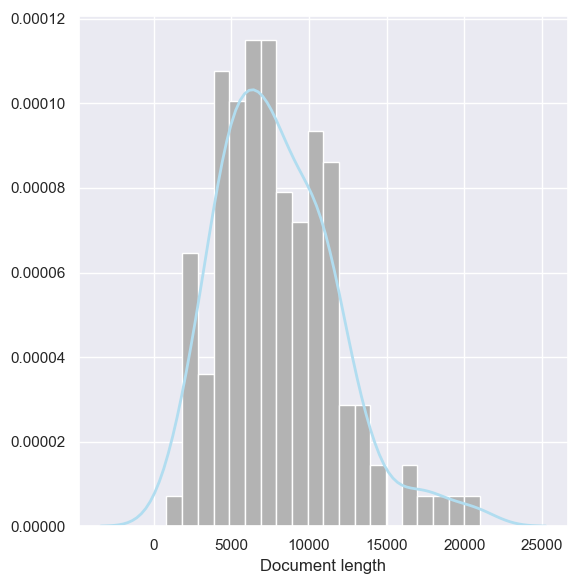

In [22]:
# brewer.pal(n = 8, name = "Set2")
# [1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494" "#B3B3B3"
# palette(brewer.pal(n = 8, name = "Set2"))

lns = [len(str(x)) for x in df['context']]
distplot = sns.distplot(lns, bins=20, kde=True, axlabel='Document length', 
                        color='#b3b3b3',
                        kde_kws={"color": '#B1DDF0', "lw": 2, "alpha":1},
             hist_kws={"linewidth": 1,"alpha": 1})

plt.tight_layout()
plt.savefig('figure/distplot.png')
plt.show()

In [227]:
# count = df['context'].str.split().apply(len).value_counts()
# count.values

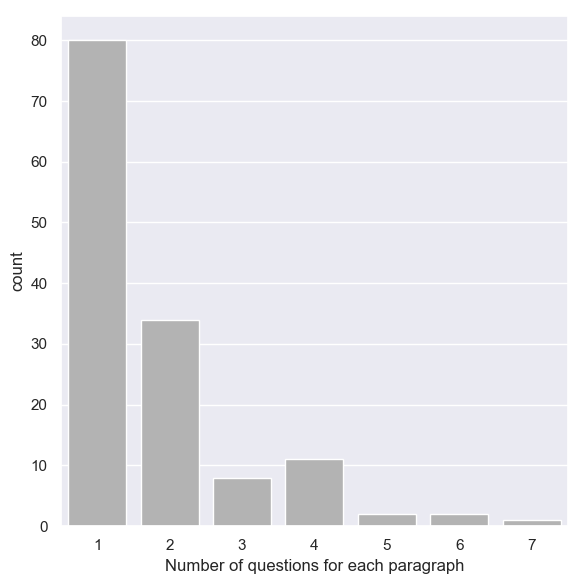

In [17]:
countplot = sns.countplot(df['Number of questions for each paragraph'], color='#b3b3b3',linewidth=1)
plt.tight_layout()
plt.savefig('figure/countplot.png')
plt.show()

In [17]:
questions = df['Number of questions for each paragraph'].values
print("mean of arr : ", np.mean(questions)) 
print("std of arr : ", np.std(questions)) 

mean of arr :  1.7753623188405796
std of arr :  1.2039675710762805
